In [1]:
import numpy as np
import networkx as nx
import os, time

import os.path as osp
import glob
from wmpgnn.datasets.graph_dataset import CustomDataset
from wmpgnn.datasets.hetero_graph_dataset import CustomHeteroDataset
from torch_geometric.loader import DataLoader
import contextlib
import torch
from torch import nn
from torch_scatter import scatter_add
from wmpgnn.performance.reconstruction import reconstruct_decay

In [2]:
from wmpgnn.model.gnn_model import GNN
from wmpgnn.model.model_loader import ModelLoader
from wmpgnn.configs.config_loader import ConfigLoader
from wmpgnn.datasets.data_handler import DataHandler
# Load the configuration
config_loader = ConfigLoader("config_files/had_heteromp_gnn_inference_B_DD.yaml", environment_prefix="DL")
#config_loader = ConfigLoader("config_files/heteromp_gnn_inference.yaml", environment_prefix="DL")

In [3]:
from wmpgnn.performance.performance import Performance

In [4]:
perf = Performance(config_loader)

/home/sutclw/Work/Zurich/LHCb/GNNs/weighted_MP_gnn/wmpgnn/performance/performance.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(

In [5]:
config_loader.get("inference")

{'model_file': '../bn_trainings/Final_full_graph_hetero_8block_36_epochs_message_passing_BCE_hadronic_cocktail_bn_4mlp_layers.pt',
 'name': 'had_B_DD_hetero_wmp_BCE_full_graphs',
 'results_dir': '/home/sutclw/Work/Zurich/LHCb/GNNs/paper_results/test_B_DD_hetero_wmpgnn_had'}

0


/home/sutclw/Work/Zurich/LHCb/GNNs/weighted_MP_gnn/wmpgnn/performance/performance.py:679: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.event_df = self.event_df._append({'EventNumber': event,
/home/sutclw/Work/Zurich/LHCb/GNNs/weighted_MP_gnn/wmpgnn/performance/performance.py:655: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fix, axs = plt.subplots(2, figsize=(10, 10))


100
200


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

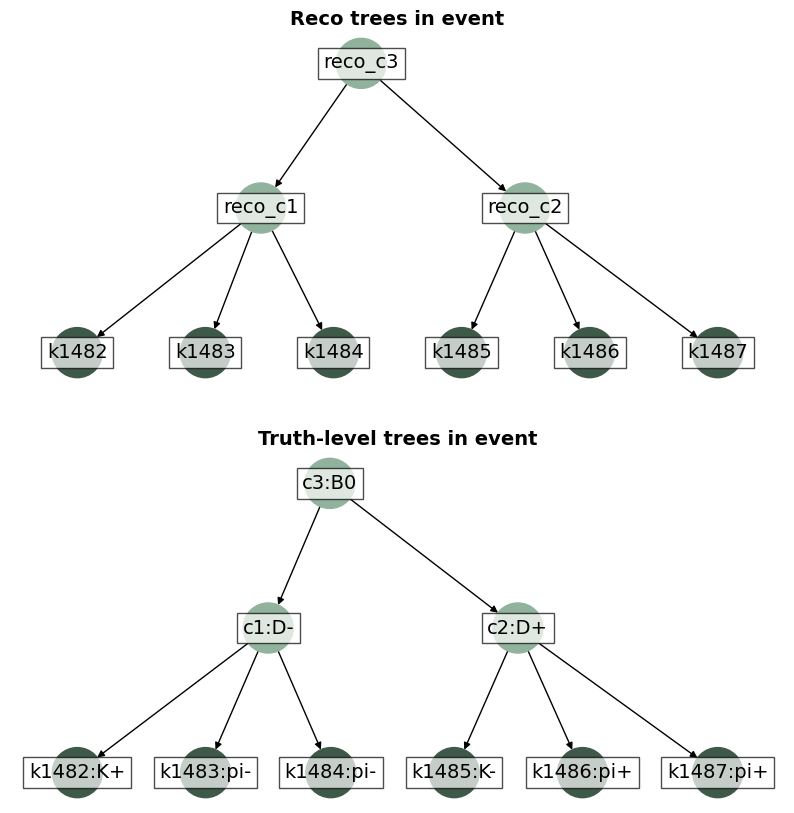

In [6]:
perf.evaluate_reco_performance(event_max=10000,pruning_cut=0.2,plot_perfect_decaychains=20)

In [ ]:
perf.unset_pruning(layer=7)

In [7]:
perf.model.cuda()

HeteroGNN(
  (_encoder): HeteroGraphCoder(
    (_global_model): WrappedModelFnModule(
      (_model): MLP(-1, 128, 128, 128, 16)
    )
    (_edge_models_model_dict): ModuleDict(
      (('tracks', 'to', 'tracks')): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 16)
      )
      (('tracks', 'to', 'pvs')): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 16)
      )
    )
    (_node_models_model_dict): ModuleDict(
      (tracks): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 16)
      )
      (pvs): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 16)
      )
    )
  )
  (_blocks): ModuleList(
    (0-7): 8 x HeteroGraphNetwork(
      (_edge_block): HeteroEdgeBlock(
        (_edge_models_model_dict): ModuleDict(
          (('tracks', 'to', 'tracks')): MLP(-1, 128, 128, 128, 16)
          (('tracks', 'to', 'pvs')): MLP(-1, 128, 128, 128, 16)
        )
      )
      (_node_block): HeteroNodeBlock(
        (_received_edges_aggregat

In [8]:
vdata

NameError: name 'vdata' is not defined

In [15]:
from wmpgnn.performance.reconstruction import particle_name
import matplotlib.pyplot as plt

In [16]:
for i,vdata in enumerate(perf.dataset):
    vdata_copy = vdata.clone()
    vdata.cuda()
    vdata
    
    gout = perf.model(vdata)
    # X=torch.concat([vdata['tracks'].x[vdata[('tracks','to','pvs')].edge_index[0]],
    #                     vdata['pvs'].x[vdata[('tracks','to','pvs')].edge_index[1]],
    #                     vdata[('tracks','to','pvs')].edges], -1)

    # pv_outputs = NN(X)
    #eco_LCA = perf.lca_reco_matrix(gout)
    gout.cpu()
    vdata.cpu()
    #reco_LCA = perf.lca_reco_matrix(gout)
    reco_LCA = perf.lca_reco_matrix(gout)
    particle_keys = list(vdata["final_keys"].numpy())
    reco_cluster_dict, reco_num_clusters_per_order, _ = reconstruct_decay(
    reco_LCA, particle_keys)
    
    true_LCA = perf.lca_truth_matrix(vdata)
    particle_keys = list(vdata["truth_part_keys"].numpy())
    particle_ids = list(map(particle_name, vdata['truth_part_ids'].numpy()))
    truth_cluster_dict, truth_num_clusters_per_order, max_full_chain_depth_in_event = reconstruct_decay(
    true_LCA, particle_keys, particle_ids=particle_ids, truth_level_simulation=1)
    # if i ==5:
    #     break
    # if i ==17:
    #     break
    # if i ==52:
    #     break

    if i ==62:
        break
    # if i ==23:  inc
    #      break

    # if i ==243:
    #      break

No particles found.
1
No particles found.
0
No particles found.
1
No particles found.
1
No particles found.
1
No particles found.
1
No particles found.
0
No particles found.
1


In [17]:
# 47

# 78

<Figure size 640x480 with 0 Axes>

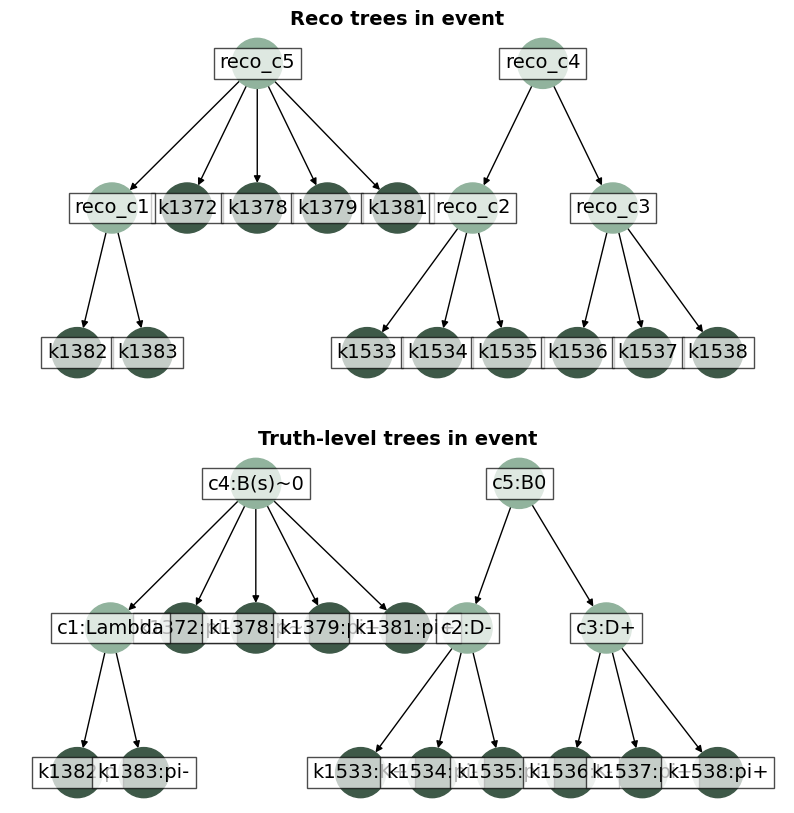

In [18]:
plt.clf()
fix, axs = plt.subplots(2, figsize=(10, 10))
axs[0].set_title('Reco trees in event',
                 fontweight='bold', fontsize=14)
particle_keys = list(vdata["final_keys"].numpy())
reco_cluster_dict, reco_num_clusters_per_order, _ = reconstruct_decay(
    reco_LCA, particle_keys, axs[0])
axs[1].set_title('Truth-level trees in event',
                 fontweight='bold', fontsize=14)
#particle_keys = list(vdata["init_keys"].numpy())
#particle_ids = list(map(particle_name, vdata['init_partids'].numpy()))
particle_keys = list(vdata["truth_part_keys"].numpy())
particle_ids = list(map(particle_name, vdata['truth_part_ids'].numpy()))
truth_cluster_dict, truth_num_clusters_per_order, max_full_chain_depth_in_event = reconstruct_decay(
    true_LCA, particle_keys, axs[1], particle_ids=particle_ids, truth_level_simulation=1)
# plt.show()
#plt.savefig(f"fully_reconstructed.png",dpi=300)
#plt.savefig(f"{self.results_dir}/{self.name}_perfect_reco_decay_chain_{plot_perfect_decaychains}.pd

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import numpy as np

def init_thesis_plot_style():
    my_rc_params = {
        "xtick.direction": "in",
        "xtick.major.size": 8.0,
        "xtick.minor.size": 4.0,
        "xtick.minor.visible": True,
        "xtick.major.width": 1.2,
        "xtick.minor.width": 0.9,
        "ytick.direction": "in",
        "ytick.major.size": 8.0,
        "ytick.minor.size": 4.0,
        "ytick.minor.visible": True,
        "ytick.major.width": 1.2,
        "ytick.minor.width": 0.9,
        "errorbar.capsize": 2,
        "axes.linewidth": 1.2,
        # "font.familiy": "serif",
        "font.size": 14,
        "axes.grid": False,
        "ytick.right": True,
        "xtick.top": True
    }
    return(my_rc_params)


init_thesis_plot_style()
plt.rcParams.update(init_thesis_plot_style())

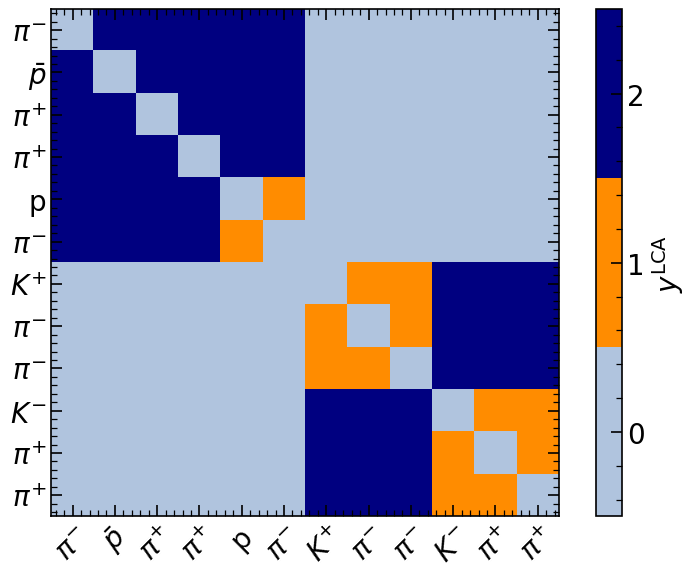

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib.colorbar import ColorbarBase
# Sample data

# Create a DataFrame
#df = pd.DataFrame(data)
df=reco_LCA
# Extract unique senders and receivers
unique_nodes = np.unique(np.concatenate([df['senders'], df['receivers']]))

# Create a mapping from original labels to new numerical indices
label_to_index = {label: idx for idx, label in enumerate(unique_nodes)}
particle_mapping= dict( zip(list(unique_nodes), list(vdata["part_ids"][unique_nodes].numpy())))
label_to_index = {label: idx for idx, label in enumerate(unique_nodes)}
latex_mapping = {"pi-":r"$\pi^{-}$","pi+":r"$\pi^{+}$","K-":r"$K^{-}$","K+":r"$K^{+}$", "p":"p","p~": r"$\bar{p}$"}
particle_labels = { val : latex_mapping[particle_name(particle_mapping[key])] for key, val in label_to_index.items()}
# Relabel senders and receivers
df['new_senders'] = df['senders'].map(label_to_index)
df['new_receivers'] = df['receivers'].map(label_to_index)

# Create a matrix of LCA_dec values
num_nodes = len(unique_nodes)
matrix = np.zeros((num_nodes, num_nodes))

for _, row in df.iterrows():
    matrix[row['new_senders'], row['new_receivers']] = row['LCA_dec']
    matrix[row['new_receivers'], row['new_senders']] = row['LCA_dec']

# # Plot the matrix
# plt.figure(figsize=(8, 6))
# plt.imshow(matrix, cmap='viridis', origin='upper')
# plt.colorbar(label=r'$y^{\rm LCA}$')

# # Set x and y axis labels using particle_labels
# xtick_labels = [particle_labels[i] for i in range(num_nodes)]
# ytick_labels = [particle_labels[i] for i in range(num_nodes)]

# plt.xticks(range(num_nodes), xtick_labels, rotation=45)
# plt.yticks(range(num_nodes), ytick_labels)

# #plt.xlabel('Receivers')
# #plt.ylabel('Senders')
# #plt.title('LCA_dec Matrix')
# plt.tight_layout()  # Adjust layout to prevent label overlap
# plt.show()

# Define discrete values for LCA_dec
unique_LCA_dec = np.array([0,1,2])
num_unique_LCA_dec = 3

# Create a discrete colormap
cmap = ListedColormap(['lightsteelblue', 'darkorange', 'navy'])  # Add more colors if needed
bounds = np.arange(num_unique_LCA_dec + 1) - 0.5
norm = plt.Normalize(vmin=min(unique_LCA_dec) - 0.5, vmax=max(unique_LCA_dec) + 0.5)

# Plot the matrix
plt.figure(figsize=(8, 6))
plt.imshow(matrix, cmap=cmap, norm=norm, origin='upper')

# Create a discrete color bar
# cbar = plt.colorbar(ticks=unique_LCA_dec)
# cbar.set_label(r'$y^{\rm LCA}$')
# # plt.colorbar(label=r'$y^{\rm LCA}$')
# # Set x and y axis labels using particle_labels
# xtick_labels = [particle_labels[i] for i in range(num_nodes)]
# ytick_labels = [particle_labels[i] for i in range(num_nodes)]

# plt.xticks(range(num_nodes), xtick_labels, rotation=45)
# plt.yticks(range(num_nodes), ytick_labels)

cbar = plt.colorbar(ticks=unique_LCA_dec)
cbar.set_label(r'$y^{\rm LCA}$', fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Increase tick label size on the colorbar

# Set x and y axis labels using particle_labels and increase tick label size
xtick_labels = [particle_labels[i] for i in range(num_nodes)]
ytick_labels = [particle_labels[i] for i in range(num_nodes)]

plt.xticks(range(num_nodes), xtick_labels, rotation=45, fontsize=20)
plt.yticks(range(num_nodes), ytick_labels, fontsize=20)

#plt.title('LCA_dec Matrix')
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.savefig("LCA_reco.png",dpi=300)
plt.savefig("LCA_reco.pdf",dpi=300)

In [57]:
gout

HeteroDataBatch(
  init_senders=[35914],
  init_receivers=[35914],
  init_y=[35914, 4],
  init_keys=[202],
  init_moth_ids=[17957],
  init_partids=[202],
  final_keys=[202],
  moth_ids=[17957],
  part_ids=[202],
  lca_chain=[18],
  truth_senders=[36],
  truth_receivers=[36],
  truth_y=[36, 4],
  truth_moth_ids=[18],
  truth_part_ids=[9],
  truth_part_keys=[9],
  old_y=[0, 4],
  tracks={
    x=[202, 16],
    batch=[202],
    ptr=[2],
  },
  pvs={
    x=[6, 16],
    batch=[6],
    ptr=[2],
  },
  globals={
    x=[1, 16],
    batch=[1],
    ptr=[2],
  },
  receivers={},
  senders={},
  (tracks, to, pvs)={
    edge_index=[2, 1212],
    y=[1212, 1],
    edges=[1212, 1],
  },
  (tracks, to, tracks)={
    edge_index=[2, 36],
    y=[36, 4],
    edges=[36, 4],
  }
)

In [15]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

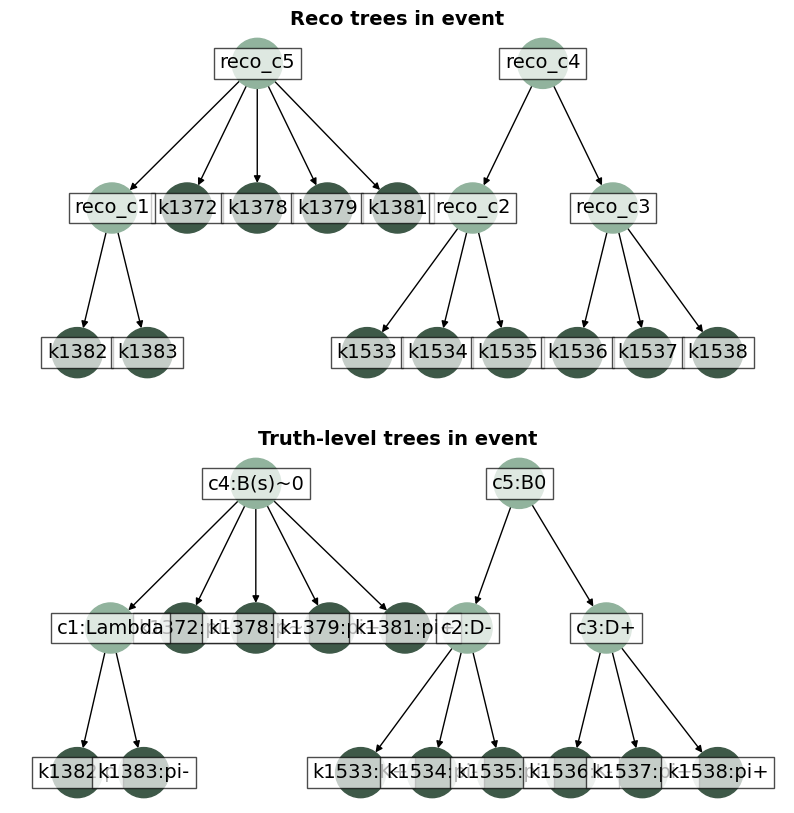

In [132]:
plt.clf()
fix, axs = plt.subplots(2, figsize=(10, 10))
axs[0].set_title('Reco trees in event',
                 fontweight='bold', fontsize=14)
particle_keys = list(vdata["final_keys"].numpy())
reco_cluster_dict, reco_num_clusters_per_order, _ = reconstruct_decay(
    reco_LCA, particle_keys, axs[0])
axs[1].set_title('Truth-level trees in event',
                 fontweight='bold', fontsize=14)
#particle_keys = list(vdata["init_keys"].numpy())
#particle_ids = list(map(particle_name, vdata['init_partids'].numpy()))
particle_keys = list(vdata["truth_part_keys"].numpy())
particle_ids = list(map(particle_name, vdata['truth_part_ids'].numpy()))
truth_cluster_dict, truth_num_clusters_per_order, max_full_chain_depth_in_event = reconstruct_decay(
    true_LCA, particle_keys, axs[1], particle_ids=particle_ids, truth_level_simulation=1)
# plt.show()
#plt.savefig(f"fully_reconstructed.png",dpi=300)
#plt.savefig(f"{self.results_dir}/{self.name}_perfect_reco_decay_chain_{plot_perfect_decaychains}.pdf")
#plot_perfect_decaychains = plot_perfect_decaychains - 1

In [23]:
from torch_geometric.nn.models import MLP
from torch.nn import ReLU

def mlp(output_size):
    return lambda: MLP(in_channels=-1, hidden_channels=128,  # Increased size
                       out_channels=output_size, num_layers=6, norm='batch_norm', act=ReLU())  


NN =mlp(1)()

NN.load_state_dict(torch.load('MLP_pvs.pt', weights_only=True))
NN.eval()

MLP(-1, 128, 128, 128, 128, 128, 1)

In [24]:
X=torch.concat([vdata_copy['tracks'].x[vdata_copy[('tracks','to','pvs')].edge_index[0]],
                vdata_copy['pvs'].x[vdata_copy[('tracks','to','pvs')].edge_index[1]],
                vdata_copy[('tracks','to','pvs')].edges], -1)

outputs = NN(X)

In [25]:
#gout = perf.model(vdata)

In [26]:
#reco_cluster_dict

In [27]:
truth_cluster_dict

{1372: {'node_keys': [1372, 1378, 1379, 1381, 1382, 1383],
  'LCA_values': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1],
  'labels': ['k1372:pi-',
   'k1378:p~',
   'k1379:pi+',
   'k1381:pi+',
   'k1382:p',
   'k1383:pi-',
   'k1533:K+',
   'k1534:pi-',
   'k1535:pi-',
   'k1536:K-',
   'k1537:pi+',
   'k1538:pi+',
   'c1:Lambda',
   'c2:D-',
   'c3:D+',
   'c4:B(s)~0',
   'c5:B0']},
 1533: {'node_keys': [1533, 1534, 1535, 1536, 1537, 1538],
  'LCA_values': [1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1],
  'labels': ['k1372:pi-',
   'k1378:p~',
   'k1379:pi+',
   'k1381:pi+',
   'k1382:p',
   'k1383:pi-',
   'k1533:K+',
   'k1534:pi-',
   'k1535:pi-',
   'k1536:K-',
   'k1537:pi+',
   'k1538:pi+',
   'c1:Lambda',
   'c2:D-',
   'c3:D+',
   'c4:B(s)~0',
   'c5:B0']}}

In [28]:
node_keys = truth_cluster_dict[1862]['node_keys'] 

KeyError: 1862

In [29]:
node_keys= truth_cluster_dict[1453]['node_keys'] +  truth_cluster_dict[2052]['node_keys'] 

KeyError: 1453

In [30]:
#node_keys= reco_cluster_dict[623]['node_keys'] +  reco_cluster_dict[791]['node_keys'] 

In [31]:
#node_keys= reco_cluster_dict[566]['node_keys'] +  reco_cluster_dict[574]['node_keys'] 

In [32]:
node_keys= reco_cluster_dict[1372]['node_keys'] +  reco_cluster_dict[1533]['node_keys'] 

In [33]:
#node_keys= truth_cluster_dict[938]['node_keys'] +  truth_cluster_dict[968]['node_keys']   +  truth_cluster_dict[3031]['node_keys'] 

In [34]:
node_keys

[1372, 1378, 1379, 1381, 1382, 1383, 1533, 1534, 1535, 1536, 1537, 1538]

In [35]:
import matplotlib.pyplot as plt

In [36]:
ind1= (node_keys[0]==vdata_copy.final_keys) | (node_keys[1]==vdata_copy.final_keys) | (node_keys[2]==vdata_copy.final_keys) | (node_keys[3]==vdata_copy.final_keys) | (node_keys[4]==vdata_copy.final_keys) | (node_keys[5]==vdata_copy.final_keys) | \
(node_keys[6]==vdata_copy.final_keys) 

In [37]:
ind1= (node_keys[0]==vdata_copy.final_keys) | (node_keys[1]==vdata_copy.final_keys) | (node_keys[2]==vdata_copy.final_keys) | (node_keys[3]==vdata_copy.final_keys) | (node_keys[4]==vdata_copy.final_keys) | (node_keys[5]==vdata_copy.final_keys) | \
(node_keys[6]==vdata_copy.final_keys) | (node_keys[7]==vdata_copy.final_keys) #| (node_keys[8]==vdata_copy.final_keys) | (node_keys[9]==vdata_copy.final_keys) | (node_keys[10]==vdata_copy.final_keys) | (node_keys[11]==vdata_copy.final_keys) 

In [38]:
ind1= (node_keys[0]==vdata_copy.final_keys) | (node_keys[1]==vdata_copy.final_keys) | (node_keys[2]==vdata_copy.final_keys) | (node_keys[3]==vdata_copy.final_keys) | (node_keys[4]==vdata_copy.final_keys) | (node_keys[5]==vdata_copy.final_keys) | \
(node_keys[6]==vdata_copy.final_keys) | (node_keys[7]==vdata_copy.final_keys) | (node_keys[8]==vdata_copy.final_keys) | (node_keys[9]==vdata_copy.final_keys) | (node_keys[10]==vdata_copy.final_keys) | (node_keys[11]==vdata_copy.final_keys) 

In [39]:
x = vdata_copy["tracks"].x[:,:3].numpy()
p = vdata_copy["tracks"].x[:,3:6].numpy()
xB = vdata_copy["tracks"].x[ind1,:3].numpy()
pB = vdata_copy["tracks"].x[ind1,3:6].numpy()

In [40]:
p_norm = p / np.sqrt(np.sum(p**2))

In [41]:
p_normB = pB / np.sqrt(np.sum(pB**2))

In [42]:
track_ids = gout[('tracks','to','pvs')].edge_index[0][(perf.model._blocks[-1].edge_weights[('tracks','to','pvs')] >0.5).squeeze(1).cpu()]
pv_ids = gout[('tracks','to','pvs')].edge_index[1][(perf.model._blocks[-1].edge_weights[('tracks','to','pvs')] >0.5).squeeze(1).cpu()]

In [43]:

b_tracks = vdata[('tracks', 'to', 'tracks')].edge_index[0][vdata[('tracks', 'to', 'tracks')].y[:, 0] == 0]

tracks = vdata[('tracks', 'to', 'tracks')].edge_index[0]
unique_b_tracks = torch.unique(b_tracks)
unique_tracks = torch.unique(tracks)

In [47]:
pv_indices = []
true_indices = []
for i in unique_tracks:
    index = (vdata[('tracks', 'to', 'pvs')].edge_index[0] == i)
    pv_indices.append(torch.argmax(
        perf.model._blocks[-1].edge_weights[('tracks', 'to', 'pvs')][index]).item() )
    true_indices.append(torch.argmax(
                    vdata[('tracks', 'to', 'pvs')].y[index]))    

    

In [45]:
pv_indices = []
true_indices = []
for i in unique_tracks:
    index = (vdata[('tracks', 'to', 'pvs')].edge_index[0] == i)
    pv_indices.append(torch.argmax(
        outputs[index]).item() )
    true_indices.append(torch.argmax(
                    vdata[('tracks', 'to', 'pvs')].y[index]))


In [46]:
pv_indices = []
true_indices = []
for i in unique_tracks:
    index = (vdata[('tracks', 'to', 'pvs')].edge_index[0] == i)
    pv_indices.append(torch.argmin(
        vdata_copy[('tracks', 'to', 'pvs')].edges[index]).item() )
    true_indices.append(torch.argmax(
                    vdata[('tracks', 'to', 'pvs')].y[index]))

In [320]:
#vdata[('tracks', 'to', 'pvs')].edges[index]

In [321]:
len(unique_tracks)

172

In [322]:
#pv_indices

In [148]:
len(pv_indices)

172

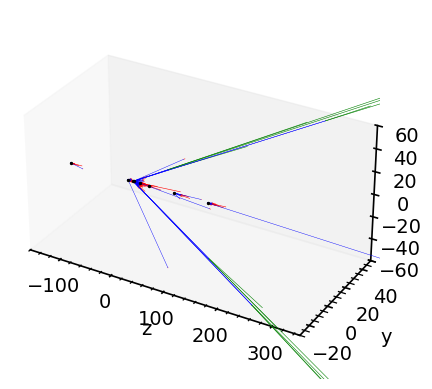

In [350]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
for i in range(x.shape[0]):
    if i not in unique_b_tracks:
        vector = []
        for k in np.linspace(0,200,2):
            vector.append(x[i,:]+ k*p_norm[i,:])
        v = np.array(vector)
        zline = v[:,2]
        xline = v[:,0]
        yline = v[:,1]
        ax.plot3D(zline, yline, xline, 'red', linewidth=0.4)

for i in range(xB.shape[0]):
    vector = []
    for k in np.linspace(0,2000,2):
        vector.append(xB[i,:]+ k*p_normB[i,:])
    v = np.array(vector)
    zline = v[:,2]
    xline = v[:,0]
    yline = v[:,1]
    ax.plot3D(zline, yline, xline, 'green', linewidth=0.4)

count = 0
count2 = 0
for track_id, pv_id, true_id in zip(unique_tracks, pv_indices, true_indices):
    v = []
    v.append(vdata_copy['tracks'].x[track_id,:3].numpy())
    v.append(vdata_copy['pvs'].x[pv_id,:3].numpy())
    #print(v)
    v = np.array(v)
    #print(v.shape)
    zline = v[:,2]
    xline = v[:,0]
    yline = v[:,1]
    # ax.set_ylim(bottom=-5,top=5)
    # ax.set_zlim(bottom=-100,top=100)
    # ax.set_xlim(left=-5,right=5) 
    if pv_id == true_id:
        color = 'blue'
    else:
        color = 'purple'
    # if count == 0:
    #     ax.plot3D(zline, yline, xline, 'blue', linewidth=0.2, label='HGNN assoc.')
    # else:
    #     ax.plot3D(zline, yline, xline, 'blue', linewidth=0.2)
    if count == 0:
        ax.plot3D(zline, yline, xline,   color, linewidth=0.3, label='minIP correct assoc.')
    elif  pv_id != true_id and count2 == 0:
        ax.plot3D(zline, yline, xline,   color, linewidth=0.3, label='minIP false assoc.')
    else:
        ax.plot3D(zline, yline, xline,   color, linewidth=0.3)
    if pv_id == true_id:
        count+=1
    if pv_id != true_id:
        count2+=1
# for i in range(track_ids.shape[0]):
#     v = []
#     v.append(vdata_copy['tracks'].x[track_ids[i],:3].numpy())
#     v.append(vdata_copy['pvs'].x[pv_ids[i],:3].numpy())
#     #print(v)
#     v = np.array(v)
#     #print(v.shape)
#     zline = v[:,2]
#     xline = v[:,0]
#     yline = v[:,1]
#     # ax.set_ylim(bottom=-5,top=5)
#     # ax.set_zlim(bottom=-100,top=100)
#     # ax.set_xlim(left=-5,right=5)    
#     ax.plot3D(zline, yline, xline, 'blue', linewidth=0.2)

# for i in range(gout[('tracks','to','tracks')].edge_index.shape[1]):
#     v = []
#     v.append(vdata_copy['tracks'].x[gout[('tracks','to','tracks')].edge_index[0][i],:3].numpy())
#     v.append(vdata_copy['tracks'].x[gout[('tracks','to','tracks')].edge_index[1][i],:3].numpy())
#     #print(v)
#     v = np.array(v)
#     #print(v.shape)
#     zline = v[:,2]
#     xline = v[:,0]
#     yline = v[:,1]
#     if i==0:
#         ax.plot3D(zline, yline, xline, 'purple', linewidth=0.2)
#     else:
#         ax.plot3D(zline, yline, xline, 'purple', linewidth=0.2)
ax.set_zlim(bottom=-60,top=60)
ax.set_ylim(bottom=-30,top=50)
ax.set_xlim(left=-160,right=350)  
for i in range(0,vdata['pvs'].x.shape[0]):
    if i==0:
        ax.scatter3D(vdata_copy['pvs'].x[i][2].item(),vdata_copy['pvs'].x[i][1].item() ,vdata_copy['pvs'].x[i][0].item(), c='black', s=2, label="pvs")
    else:
        ax.scatter3D(vdata_copy['pvs'].x[i][2].item(),vdata_copy['pvs'].x[i][1].item() ,vdata_copy['pvs'].x[i][0].item(), c='black', s=2)
ax.set_ylabel("y")
ax.set_zlabel("x") 
ax.set_xlabel("z")   
ax.grid(False)
ax.set_box_aspect((8, 4, 4))
#plt.legend()
#plt.savefig("dfei_event_minIP.png",dpi=300)
#ax.legend(loc='upper left')
# ax.xaxis.pane.set_visible(False)
# ax.yaxis.pane.set_visible(False)
# ax.zaxis.pane.set_visible(False)

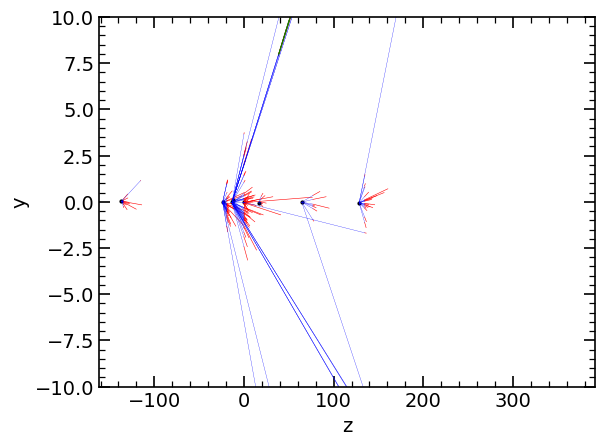

In [326]:
fig = plt.figure()
ax = plt.axes()
# Data for a three-dimensional line
for i in range(x.shape[0]):
    vector = []
    for k in np.linspace(0,200,2):
        vector.append(x[i,:]+ k*p_norm[i,:])
    v = np.array(vector)
    zline = v[:,2]
    xline = v[:,0]
    yline = v[:,1]
    ax.plot(zline, yline, 'red', linewidth=0.4)

for i in range(xB.shape[0]):
    vector = []
    for k in np.linspace(0,200,2):
        vector.append(xB[i,:]+ k*p_normB[i,:])
    v = np.array(vector)
    zline = v[:,2]
    xline = v[:,0]
    yline = v[:,1]
    ax.plot(zline, yline, 'green', linewidth=0.4)

count = 0
for track_id, pv_id, true_id in zip(unique_tracks, pv_indices, true_indices):
    v = []
    v.append(vdata_copy['tracks'].x[track_id,:3].numpy())
    v.append(vdata_copy['pvs'].x[pv_id,:3].numpy())
    #print(v)
    v = np.array(v)
    #print(v.shape)
    zline = v[:,2]
    xline = v[:,0]
    yline = v[:,1]
    # ax.set_ylim(bottom=-5,top=5)
    # ax.set_zlim(bottom=-100,top=100)
    # ax.set_xlim(left=-5,right=5)    
    if pv_id == true_id:
        color = 'blue'
    else:
        color = 'purple'
    
    if count == 0:
        ax.plot(zline, yline,  color, linewidth=0.2, label='HGNN assoc.')
    else:
        ax.plot(zline, yline,  color, linewidth=0.2)

# for i in range(track_ids.shape[0]):
#     v = []
#     v.append(vdata_copy['tracks'].x[track_ids[i],:3].numpy())
#     v.append(vdata_copy['pvs'].x[pv_ids[i],:3].numpy())
#     #print(v)
#     v = np.array(v)
#     #print(v.shape)
#     zline = v[:,2]
#     xline = v[:,0]
#     yline = v[:,1]
#     # ax.set_ylim(bottom=-5,top=5)
#     # ax.set_zlim(bottom=-100,top=100)
#     # ax.set_xlim(left=-5,right=5)    
#     ax.plot(zline, yline, 'blue', linewidth=0.2)

# for i in range(gout[('tracks','to','tracks')].edge_index.shape[1]):
#     v = []
#     v.append(vdata_copy['tracks'].x[gout[('tracks','to','tracks')].edge_index[0][i],:3].numpy())
#     v.append(vdata_copy['tracks'].x[gout[('tracks','to','tracks')].edge_index[1][i],:3].numpy())
#     #print(v)
#     v = np.array(v)
#     #print(v.shape)
#     zline = v[:,2]

#     xline = v[:,0]
#     yline = v[:,1]
#     if i==0:
#         ax.plot3D(zline, yline, xline, 'purple', linewidth=0.2)
#     else:
#         ax.plot3D(zline, yline, xline, 'purple', linewidth=0.2)

#ax.set_ylim(bottom=-10,top=10)
# ax.scatter3D(v2[0,ind],v2[1,ind],v2[2,ind])
ax.set_ylim(bottom=-10,top=10)
#ax.set_xlim(left=-100,right=100)    
for i in range(0,vdata['pvs'].x.shape[0]):
    if i==0:
        ax.scatter(vdata_copy['pvs'].x[i][2].item(),vdata_copy['pvs'].x[i][1].item() , c='black', s=4, label="pvs")
    else:
        ax.scatter(vdata_copy['pvs'].x[i][2].item(),vdata_copy['pvs'].x[i][1].item() , c='black', s=4)
ax.set_ylabel("y")
#ax.set_zlabel("x") 
ax.set_xlabel("z")   

plt.savefig("dfei_event_2D.png",dpi=300)

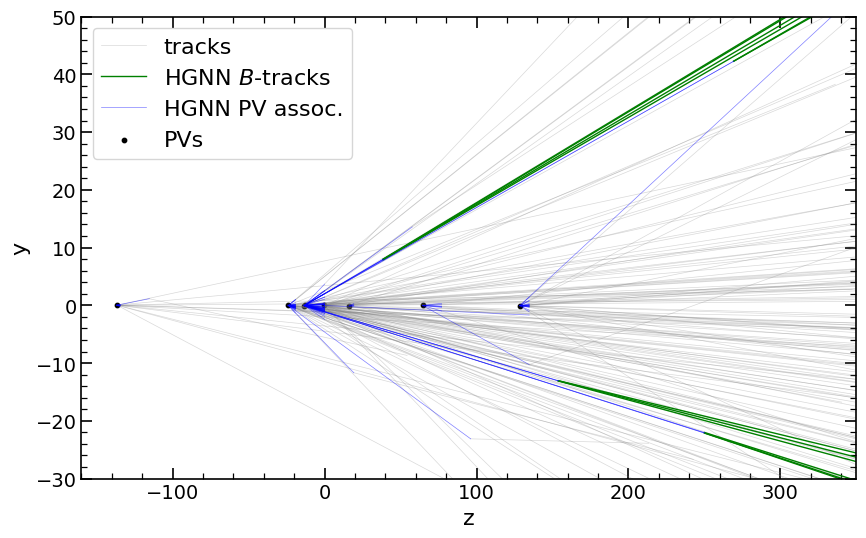

In [51]:
#fig = plt.figure(figsize=(20,8))
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
# Data for a three-dimensional line

# for i in range(0,vdata['pvs'].x.shape[0]):
#     if i==0:
#         ax.scatter(vdata_copy['pvs'].x[i][2].item(),vdata_copy['pvs'].x[i][1].item() , c='black', s=10, label="pvs")
#     else:
#         ax.scatter(vdata_copy['pvs'].x[i][2].item(),vdata_copy['pvs'].x[i][1].item() , c='black', s=10)
count = 0
for i in range(x.shape[0]):
    if i not in unique_b_tracks:
        vector = []
        for k in np.linspace(0,200000,2):
            vector.append(x[i,:]+ k*p_norm[i,:])
        v = np.array(vector)
        zline = v[:,2]
        xline = v[:,0]
        yline = v[:,1]
        if count == 0:
            ax.plot(zline, yline, 'grey', linewidth=0.5, label = r"tracks", alpha=0.3)
        else:
            ax.plot(zline, yline, 'grey', linewidth=0.5, alpha=0.3)
        count += 1
    
count = 0
for i in range(xB.shape[0]):
    vector = []
    for k in np.linspace(0,20000,2):
        vector.append(xB[i,:]+ k*p_normB[i,:])
    v = np.array(vector)
    zline = v[:,2]
    xline = v[:,0]
    yline = v[:,1]
    #ax.plot(zline, yline, 'green', linewidth=0.4)
    if count == 0:
        ax.plot(zline, yline, 'green', linewidth=1, label = r"HGNN $B$-tracks")
    else:
        ax.plot(zline, yline, 'green', linewidth=1)        
    count += 1
count = 0
count2 = 0
for track_id, pv_id, true_id in zip(unique_tracks, pv_indices, true_indices):
    #if track_id in unique_b_tracks:
    v = []
    v.append(vdata_copy['tracks'].x[track_id,:3].numpy())
    v.append(vdata_copy['pvs'].x[pv_id,:3].numpy())
    #print(v)
    v = np.array(v)
    #print(v.shape)
    zline = v[:,2]
    xline = v[:,0]
    yline = v[:,1]
    # ax.set_ylim(bottom=-5,top=5)
    # ax.set_zlim(bottom=-100,top=100)
    # ax.set_xlim(left=-5,right=5)    
    if pv_id == true_id:
        color = 'blue'
    else:
        color = 'purple'
    #color='blue'
    
    if count == 0:
        ax.plot(zline, yline,  color, linewidth=0.5, label='HGNN PV assoc.', alpha=0.5)
    elif  pv_id != true_id and count2 == 0:
        ax.plot(zline, yline,  color, linewidth=0.5, label='HGNN false assoc.', alpha=0.5)
    else:
        ax.plot(zline, yline,  color, linewidth=0.5, alpha=0.5)
    if pv_id == true_id:
        count+=1
    if pv_id != true_id:
        count2+=1
# for i in range(track_ids.shape[0]):
#     v = []
#     v.append(vdata_copy['tracks'].x[track_ids[i],:3].numpy())
#     v.append(vdata_copy['pvs'].x[pv_ids[i],:3].numpy())
#     #print(v)
#     v = np.array(v)
#     #print(v.shape)
#     zline = v[:,2]
#     xline = v[:,0]
#     yline = v[:,1]
#     # ax.set_ylim(bottom=-5,top=5)
#     # ax.set_zlim(bottom=-100,top=100)
#     # ax.set_xlim(left=-5,right=5)    
#     ax.plot(zline, yline, 'blue', linewidth=0.2)

# for i in range(gout[('tracks','to','tracks')].edge_index.shape[1]):
#     v = []
#     v.append(vdata_copy['tracks'].x[gout[('tracks','to','tracks')].edge_index[0][i],:3].numpy())
#     v.append(vdata_copy['tracks'].x[gout[('tracks','to','tracks')].edge_index[1][i],:3].numpy())
#     #print(v)
#     v = np.array(v)
#     #print(v.shape)
#     zline = v[:,2]
#     xline = v[:,0]
#     yline = v[:,1]
#     if i==0:
#         ax.plot3D(zline, yline, xline, 'purple', linewidth=0.2)
#     else:
#         ax.plot3D(zline, yline, xline, 'purple', linewidth=0.2)

#ax.set_ylim(bottom=-10,top=10)
# ax.scatter3D(v2[0,ind],v2[1,ind],v2[2,ind])
ax.set_ylim(bottom=-30,top=50)
ax.set_xlim(left=-160,right=350)    
for i in range(0,vdata['pvs'].x.shape[0]):
    if i==0:
        ax.scatter(vdata_copy['pvs'].x[i][2].item(),vdata_copy['pvs'].x[i][1].item() , c='black', s=10, label="PVs")
    else:
        ax.scatter(vdata_copy['pvs'].x[i][2].item(),vdata_copy['pvs'].x[i][1].item() , c='black', s=10)
ax.set_ylabel("y", fontsize=16)
#ax.set_zlabel("x") 
ax.set_xlabel("z", fontsize=16)   
plt.legend(loc="upper left", fontsize=16)
plt.savefig("dfei_event_2D_HGNN_v4.png",dpi=400)
plt.savefig("dfei_event_2D_HGNN_v4.pdf")

In [369]:
#fig = plt.figure(figsize=(400,200))
fig = plt.figure(figsize=(8,4))
ax = plt.axes()
# Data for a three-dimensional line
count = 0
for i in range(x.shape[0]):
    vector = []
    for k in np.linspace(0,20000,2):
        vector.append(x[i,:]+ k*p_norm[i,:])
    v = np.array(vector)
    zline = v[:,2]
    xline = v[:,0]
    yline = v[:,1]
    if count == 0:
        ax.plot(zline, yline, 'red', linewidth=0.4, label = r"none $B$-Tracks",alpha=0.5)
    else:
        ax.plot(zline, yline, 'red', linewidth=0.4,alpha=0.5)
    count += 1
    
count = 0
for i in range(xB.shape[0]):
    vector = []
    for k in np.linspace(0,20000,2):
        vector.append(xB[i,:]+ k*p_normB[i,:])
    v = np.array(vector)
    zline = v[:,2]
    xline = v[:,0]
    yline = v[:,1]
    #ax.plot(zline, yline, 'green', linewidth=0.4)
    if count == 0:
        ax.plot(zline, yline, 'green', linewidth=0.4, label = r"$B$-tracks")
    else:
        ax.plot(zline, yline, 'green', linewidth=0.4)        
    count += 1
count = 0
for track_id, pv_id in zip(unique_tracks, pv_indices):
    if track_id not in b_tracks:
    v = []
    v.append(vdata_copy['tracks'].x[track_id,:3].numpy())
    v.append(vdata_copy['pvs'].x[pv_id,:3].numpy())
    #print(v)
    v = np.array(v)
    #print(v.shape)
    zline = v[:,2]
    xline = v[:,0]
    yline = v[:,1]
    # ax.set_ylim(bottom=-5,top=5)
    # ax.set_zlim(bottom=-100,top=100)
    # ax.set_xlim(left=-5,right=5)    
    if count == 0:
        ax.plot(zline, yline,  'blue', linewidth=0.2, label='HGNN assoc.')
    else:
        ax.plot(zline, yline,  'blue', linewidth=0.2)
    count += 1

# for i in range(track_ids.shape[0]):
#     v = []
#     v.append(vdata_copy['tracks'].x[track_ids[i],:3].numpy())
#     v.append(vdata_copy['pvs'].x[pv_ids[i],:3].numpy())
#     #print(v)
#     v = np.array(v)
#     #print(v.shape)
#     zline = v[:,2]
#     xline = v[:,0]
#     yline = v[:,1]
#     # ax.set_ylim(bottom=-5,top=5)
#     # ax.set_zlim(bottom=-100,top=100)
#     # ax.set_xlim(left=-5,right=5)    
#     ax.plot(zline, yline, 'blue', linewidth=0.2)

# for i in range(gout[('tracks','to','tracks')].edge_index.shape[1]):
#     v = []
#     v.append(vdata_copy['tracks'].x[gout[('tracks','to','tracks')].edge_index[0][i],:3].numpy())
#     v.append(vdata_copy['tracks'].x[gout[('tracks','to','tracks')].edge_index[1][i],:3].numpy())
#     #print(v)
#     v = np.array(v)
#     #print(v.shape)
#     zline = v[:,2]
#     xline = v[:,0]
#     yline = v[:,1]
#     if i==0:
#         ax.plot3D(zline, yline, xline, 'purple', linewidth=0.2)
#     else:
#         ax.plot3D(zline, yline, xline, 'purple', linewidth=0.2)

#ax.set_ylim(bottom=-10,top=10)
# ax.scatter3D(v2[0,ind],v2[1,ind],v2[2,ind])
ax.set_ylim(bottom=-15,top=15)
ax.set_xlim(left=-200,right=400)    
for i in range(0,vdata['pvs'].x.shape[0]):
    if i==0:
        ax.scatter(vdata_copy['pvs'].x[i][2].item(),vdata_copy['pvs'].x[i][1].item() , c='black', s=5, label="pvs")
    else:
        ax.scatter(vdata_copy['pvs'].x[i][2].item(),vdata_copy['pvs'].x[i][1].item() , c='black', s=5)
ax.set_ylabel("y")
#ax.set_zlabel("x") 
ax.set_xlabel("z")   
plt.legend(loc="upper left")
plt.savefig("dfei_event_2D_NN.png",dpi=300)

IndentationError: expected an indented block after 'if' statement on line 37 (1474370804.py, line 38)

In [212]:
!ls ../paper_results/inclusive_hetero_wmpgnn

inclusive_hetero_wmp_BCE_full_graphs_event_df.csv
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_10.pdf
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_10.png
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_1.pdf
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_1.png
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_2.pdf
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_2.png
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_3.pdf
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_3.png
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_4.pdf
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_4.png
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_5.pdf
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_5.png
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_6.pdf
inclusive_hetero_wmp_BCE_full_graphs_perfect_reco_decay_chain_6.

In [213]:
import pandas as pd

In [217]:
df

,Unnamed: 0,EventNumber,NumParticlesInEvent,NumSignalParticles,PerfectSignalReconstruction,AllParticles,PerfectReco,NoneIso,PartReco,NotFound,SigMatch
0,0,0,161,3,0,0,0,1,0,0,1
1,1,1,58,3,1,1,1,0,0,0,1
2,2,2,123,3,0,1,0,0,0,0,1
3,3,3,123,2,1,1,1,0,0,0,1
4,4,4,167,4,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
12779,12779,9009,45,5,0,0,0,1,0,0,1
12780,12780,9010,291,4,0,0,0,1,0,0,1
12781,12781,9011,70,8,0,1,0,0,0,0,1
12782,12782,9011,70,3,0,1,0,0,0,0,1


In [220]:
df = pd.read_csv("../paper_results/inclusive_hetero_wmpgnn/inclusive_hetero_wmp_BCE_full_graphs_signal_df.csv")

In [231]:
bins = np.array([2,3,4,5,6,8,11,14])
bin_centers = (bins[:-1] + bins[1:]) / 2

eff = []
std = []
#df = pd.read_csv(datasets[1])

for i in range(0,len(bins)-1):
    dfcut = df.query(f"{bins[i]} < NumSignalParticles <= {bins[i+1]} ")
    #dfcut = df.query(f"{bins[i]} < npvs <= {bins[i+1]}")
    dfcut = dfcut.groupby("EventNumber").prod()
    eff.append(np.mean(dfcut.PerfectSignalReconstruction))
    std.append(np.std(dfcut.PerfectSignalReconstruction))

(array([26.8262987 , 21.41453831, 15.86874664, 12.97658863, 12.25854383,
        13.61111111, 10.        ]),
 array([ 2.,  3.,  4.,  5.,  6.,  8., 11., 14.]),
 [<matplotlib.patches.Polygon at 0x76bc24cede10>])

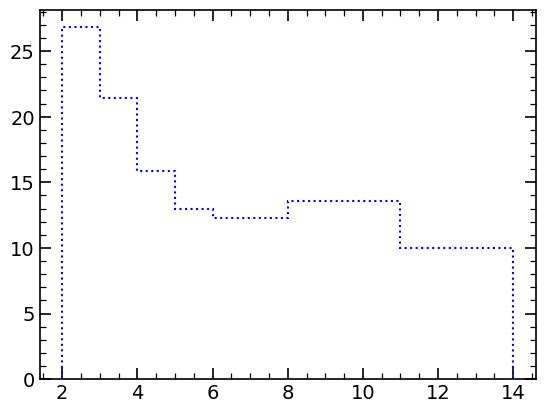

In [232]:
plt.hist(
        bin_centers,
        weights=np.array(eff)*100,
        bins=bins,
        #edgecolor="black",
        histtype="step",
        color="blue",        
        # color=colors,
            
        linewidth=1.5,
        linestyle ="dotted",
        label="min IP B-hadron",
        stacked=True
    )

In [243]:
np.sum(df.groupby("EventNumber").count()['AllParticles']==3)

108

In [250]:
np.sum(df.groupby("EventNumber").prod()['PerfectSignalReconstruction'][df.groupby("EventNumber").count()['AllParticles']==2])

208

In [251]:
np.sum(df.groupby("EventNumber").prod()['PerfectSignalReconstruction'][df.groupby("EventNumber").count()['AllParticles']==2])/np.sum(df.groupby("EventNumber").count()['AllParticles']==2)

0.06042998256827426

In [256]:
np.sum(df.groupby("EventNumber").prod()['PerfectSignalReconstruction'][df.groupby("EventNumber").count()['AllParticles']==2])

208

In [257]:
208/10000

0.0208

In [259]:
df.groupby("EventNumber").prod()['PerfectSignalReconstruction'][df.groupby("EventNumber").count()['AllParticles']==2][ df.groupby("EventNumber").prod()['PerfectSignalReconstruction'][df.groupby("EventNumber").count()['AllParticles']==2]==1]

EventNumber
59      1
243     1
357     1
372     1
383     1
       ..
8867    1
8920    1
8956    1
8972    1
8979    1
Name: PerfectSignalReconstruction, Length: 208, dtype: int64

In [261]:
|

SyntaxError: invalid syntax (525519296.py, line 1)